# Task: Classification using Neural Networks in PyTorch (Iris Dataset)
### Objective:
In this task, you will build a neural network for classifying the Iris dataset. The task is divided into five clear parts.

## Dataset:
You will use the **Iris dataset** (available in `sklearn.datasets`). It has 4 features:
- `sepal length`
- `sepal width`
- `petal length`
- `petal width`

And 3 target classes:
- Setosa (0)
- Versicolour (1)
- Virginica (2)

## PART 1: Data Preprocessing

Perform the following steps:
1. Load the dataset using `sklearn.datasets.load_iris()`.
2. Convert it to a Pandas DataFrame.
3. Shuffle the dataset.
4. Check for missing values.
5. Normalize the feature columns using `StandardScaler`.
6. Split the data into **80% training** and **20% testing**.
7. Convert the data into PyTorch tensors.

In [ ]:
# TODO BY STUDENTS: Import required libraries
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch

In [3]:
# TODO: Preprocess the Iris dataset step-by-step
# 1. Load the dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# 2. Convert to DataFrame
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y

# 3. Shuffle the dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# 4. Check for missing values
print("Missing values:\n", df.isnull().sum())

# 5. Normalize the feature columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.iloc[:, :-1])

# 6. Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, df['target'], test_size=0.2, random_state=42, stratify=df['target']
)

# 7. Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

Missing values:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


## Feedforward Neural Network

Build a PyTorch neural network with the following architecture:

- Input Layer: 4 neurons
- Hidden Layer 1: 10 neurons + ReLU
- Output Layer: 3 neurons (no activation here, handled by loss function)

Use `nn.CrossEntropyLoss()` as the loss function.

In [4]:
# model with architecture
import torch.nn as nn
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(4, 10)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(10, 3)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# model_1 = Net()

## PART 2: Modify Architecture

Update your model as follows:
- Input Layer: 4 neurons (unchanged)
- Hidden Layer 1: 16 neurons + ReLU
- Hidden Layer 2: 8 neurons + ReLU
- Output Layer: 3 neurons

In [5]:
# TODO: Modify model to have two hidden layers
class NetModified(nn.Module):
    def __init__(self):
        super(NetModified, self).__init__()
        self.fc1 = nn.Linear(4, 16)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(16, 8)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(8, 3)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x

# model_2 = NetModified()

## PART 3: Apply Optimizer and Train models

Use the following settings:
- Optimizer: **Adam**
- Learning Rate: `0.01`
- Number of Epochs: `300`

Train the updated model and log loss.

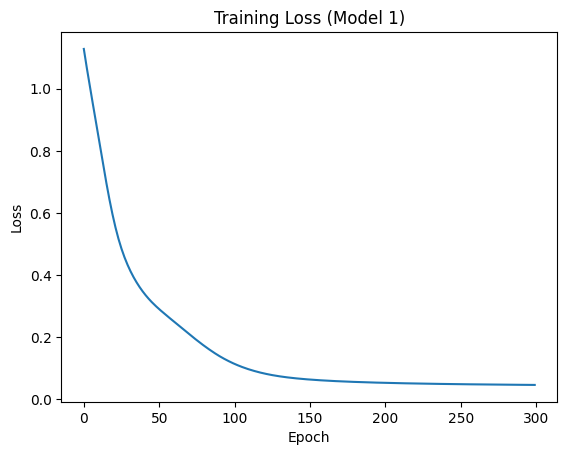

In [6]:
# TODO: Train the model and plot loss (for model_1)
import torch.optim as optim
import matplotlib.pyplot as plt

# Your code here
model_1 = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_1.parameters(), lr=0.01)
epochs = 300
losses = []

for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model_1(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

plt.plot(losses)
plt.title('Training Loss (Model 1)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()



# plt.plot(losses)
# plt.title('Training Loss')
# plt.show()

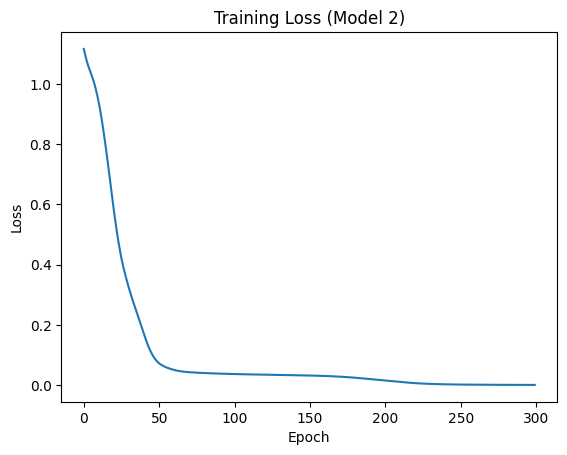

In [7]:
# TODO: Train the model and plot loss (for model_2)
import torch.optim as optim
import matplotlib.pyplot as plt

# Your code here
model_2 = NetModified()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_2.parameters(), lr=0.01)
epochs = 300
losses = []

for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model_2(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

plt.plot(losses)
plt.title('Training Loss (Model 2)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()
# plt.plot(losses)
# plt.title('Training Loss')
# plt.show()

## Evaluation of the Models

### **For model_1**

In [8]:
# TODO: Predict and calculate accuracy
from sklearn.metrics import accuracy_score, confusion_matrix

# your code here
model_1.eval()
with torch.no_grad():
    y_pred = model_1(X_test_tensor)
    y_pred_labels = torch.argmax(y_pred, dim=1).numpy()

acc = accuracy_score(y_test, y_pred_labels)
cm = confusion_matrix(y_test, y_pred_labels)
print("Accuracy (Model 1):", acc)
print("Confusion Matrix (Model 1):\n", cm)

Accuracy (Model 1): 1.0
Confusion Matrix (Model 1):
 [[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


### **For model_2**

In [9]:
# TODO: Predict and calculate accuracy
from sklearn.metrics import accuracy_score, confusion_matrix

#  your code here
model_2.eval()
with torch.no_grad():
    y_pred = model_2(X_test_tensor)
    y_pred_labels = torch.argmax(y_pred, dim=1).numpy()

acc = accuracy_score(y_test, y_pred_labels)
cm = confusion_matrix(y_test, y_pred_labels)
print("Accuracy (Model 2):", acc)
print("Confusion Matrix (Model 2):\n", cm)


Accuracy (Model 2): 0.9666666666666667
Confusion Matrix (Model 2):
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]
